<a href="https://colab.research.google.com/github/Vagarh/Master-in-Data-Science-assignments/blob/main/Taller_2_SimpleExampleCreditAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


### Step 1: Data Preparation

In [4]:
# Simulate data
data=pd.read_excel("/content/IMB469-XLS-ENG (2).xlsx")

In [5]:
data.tail()

,Agmt No,Contract Status,Start_Date,AGE,NOOFDEPE,MTHINCTH,SALDATFR,TENORYR,DWNPMFR,PROFBUS,...,QUAL_PG,SEXCODE,FULLPDC,FRICODE,WASHCODE,Region,Branch,DefaulterFlag,DefaulterType,DATASET
28901,TN31305076,Closed,2004-05-06 00:00:00,53,0,10.0,0.17,0.50,0.55,0,...,0,1,1,0,0,Vellore,Vellore,0,0,VALIDATE
28902,TN31305078,Foreclosed,27/07/2004,50,0,10.5,0.17,0.92,0.41,1,...,0,1,0,0,0,Vellore,Vellore,1,1,VALIDATE
28903,TN31305092,Closed,2004-07-10 00:00:00,49,0,10.5,0.17,0.92,0.78,1,...,0,1,1,0,0,Vellore,Vellore,0,0,VALIDATE
28904,TN31305094,Closed,2004-05-06 00:00:00,61,0,9.0,0.17,0.50,0.31,1,...,0,1,1,0,0,Vellore,Vellore,0,0,VALIDATE
28905,TN43100697,Live,NaN,32,2,4.0,1.00,1.00,0.09,0,...,0,1,0,0,0,TN1,Kumbakonam,1,1,VALIDATE


In [6]:
df = pd.DataFrame(data)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28906 entries, 0 to 28905
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Agmt No          28906 non-null  object 
 1   Contract Status  28906 non-null  object 
 2   Start_Date       25606 non-null  object 
 3   AGE              28906 non-null  int64  
 4   NOOFDEPE         28906 non-null  int64  
 5   MTHINCTH         28906 non-null  float64
 6   SALDATFR         28906 non-null  float64
 7   TENORYR          28906 non-null  float64
 8   DWNPMFR          28906 non-null  float64
 9   PROFBUS          28906 non-null  int64  
 10  QUALHSC          28906 non-null  int64  
 11  QUAL_PG          28906 non-null  int64  
 12  SEXCODE          28906 non-null  int64  
 13  FULLPDC          28906 non-null  int64  
 14  FRICODE          28906 non-null  int64  
 15  WASHCODE         28906 non-null  int64  
 16  Region           28906 non-null  object 
 17  Branch      

In [8]:
data.describe()

,AGE,NOOFDEPE,MTHINCTH,SALDATFR,TENORYR,DWNPMFR,PROFBUS,QUALHSC,QUAL_PG,SEXCODE,FULLPDC,FRICODE,WASHCODE,DefaulterFlag,DefaulterType
count,28906.000000,28906.000000,28906.000000,28906.000000,28906.000000,28906.000000,28906.000000,28906.000000,28906.000000,28906.000000,28906.000000,28906.000000,28906.000000,28906.000000,28906.000000
mean,36.439667,2.849581,8.935104,0.440023,1.283612,0.376169,0.148412,0.231751,0.040372,0.923338,0.390888,0.420881,0.189961,0.711790,0.847056
std,9.816009,1.614820,4.811211,0.461376,0.519310,0.155939,0.355514,0.421958,0.196834,0.266059,0.487958,0.493709,0.392277,0.452937,0.632588
min,18.000000,0.000000,0.100000,0.030000,0.170000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,2.000000,5.200000,0.030000,1.000000,0.290000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,3.000000,8.000000,0.170000,1.000000,0.380000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,43.000000,4.000000,10.653000,1.000000,1.500000,0.480000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,70.000000,10.000000,39.500000,1.030000,4.000000,0.880000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [9]:
numeric_features_1 = df.select_dtypes(include=['number']).columns.tolist()
categorical_features_1 = df.select_dtypes(include=['object']).columns.tolist()

In [10]:
# Imprimir las características numéricas y categóricas
print("Características numéricas:", numeric_features_1)
print("Características categóricas:", categorical_features_1)

Características numéricas: ['AGE', 'NOOFDEPE', 'MTHINCTH', 'SALDATFR', 'TENORYR', 'DWNPMFR', 'PROFBUS', 'QUALHSC', 'QUAL_PG', 'SEXCODE', 'FULLPDC', 'FRICODE', 'WASHCODE', 'DefaulterFlag', 'DefaulterType']
Características categóricas: ['Agmt No', 'Contract Status', 'Start_Date', 'Region', 'Branch', 'DATASET']


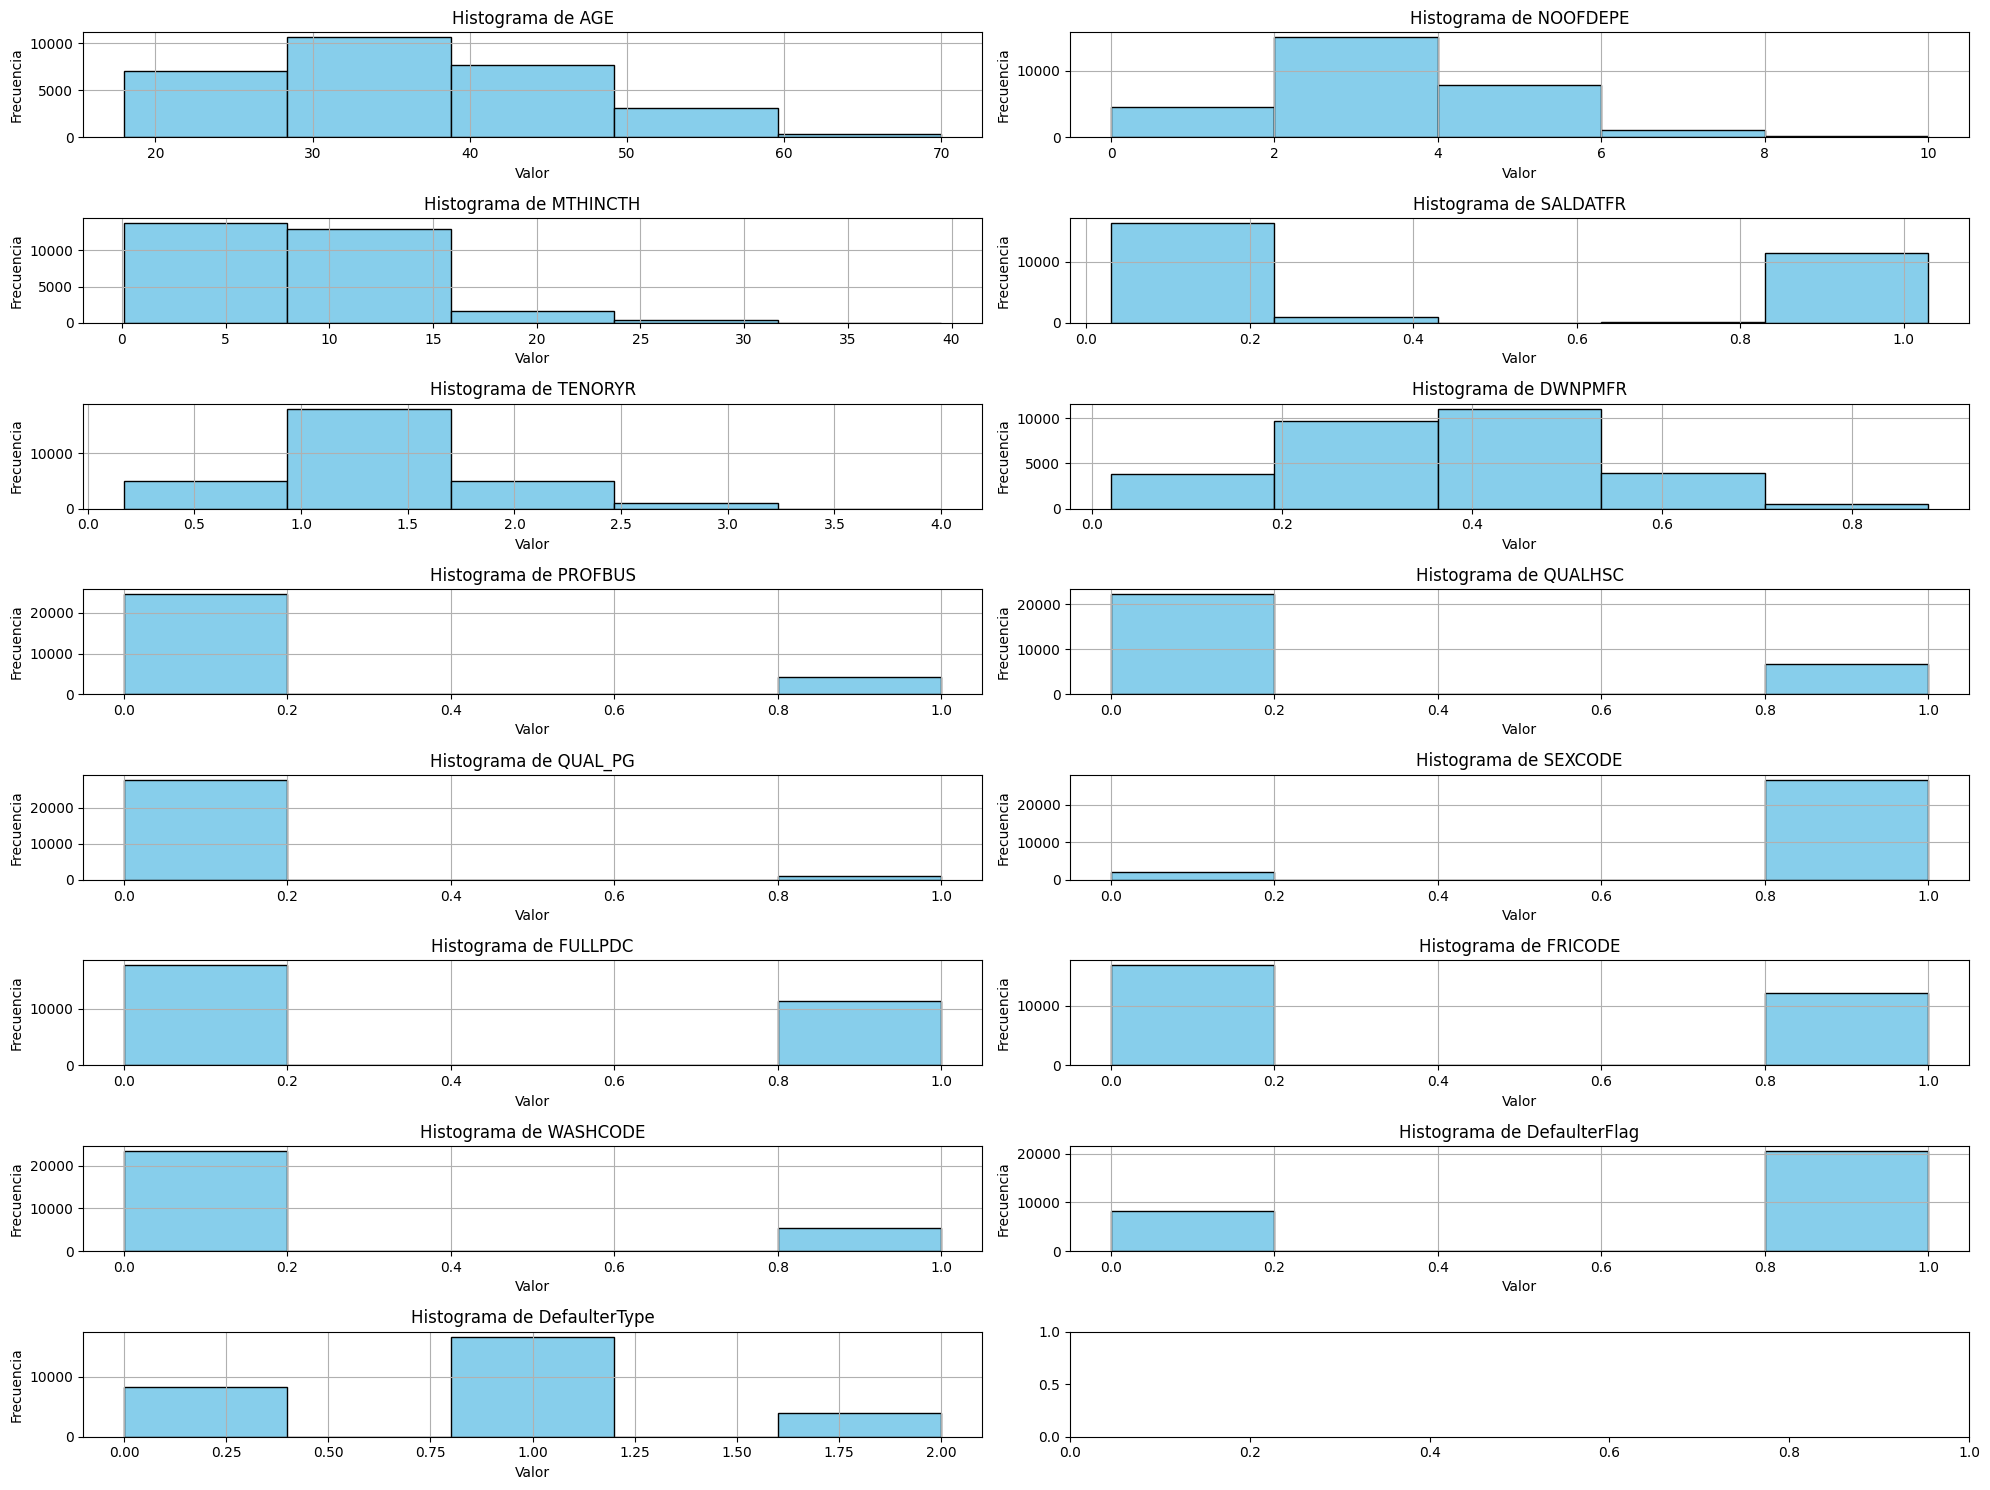

In [11]:
# Calcular el número de filas y columnas necesarias para la cuadrícula
num_cols = len(df.select_dtypes(include='number').columns)
num_rows = (num_cols + 1) // 2  # Redondear hacia arriba

# Configurar subgráficos en una cuadrícula
fig, axes = plt.subplots(num_rows, 2, figsize=(20, 15))

# Iterar sobre las columnas numéricas y graficar los histogramas en la cuadrícula
for i, numeric_column in enumerate(df.select_dtypes(include='number')):
    row = i // 2
    col = i % 2
    axes[row, col].hist(df[numeric_column], bins=5, color='skyblue', edgecolor='black')
    axes[row, col].set_title(f'Histograma de {numeric_column}')
    axes[row, col].set_xlabel('Valor')
    axes[row, col].set_ylabel('Frecuencia')
    axes[row, col].grid(True)

# Ajustar el espaciado entre subgráficos y mostrar la cuadrícula
plt.tight_layout()
plt.show()

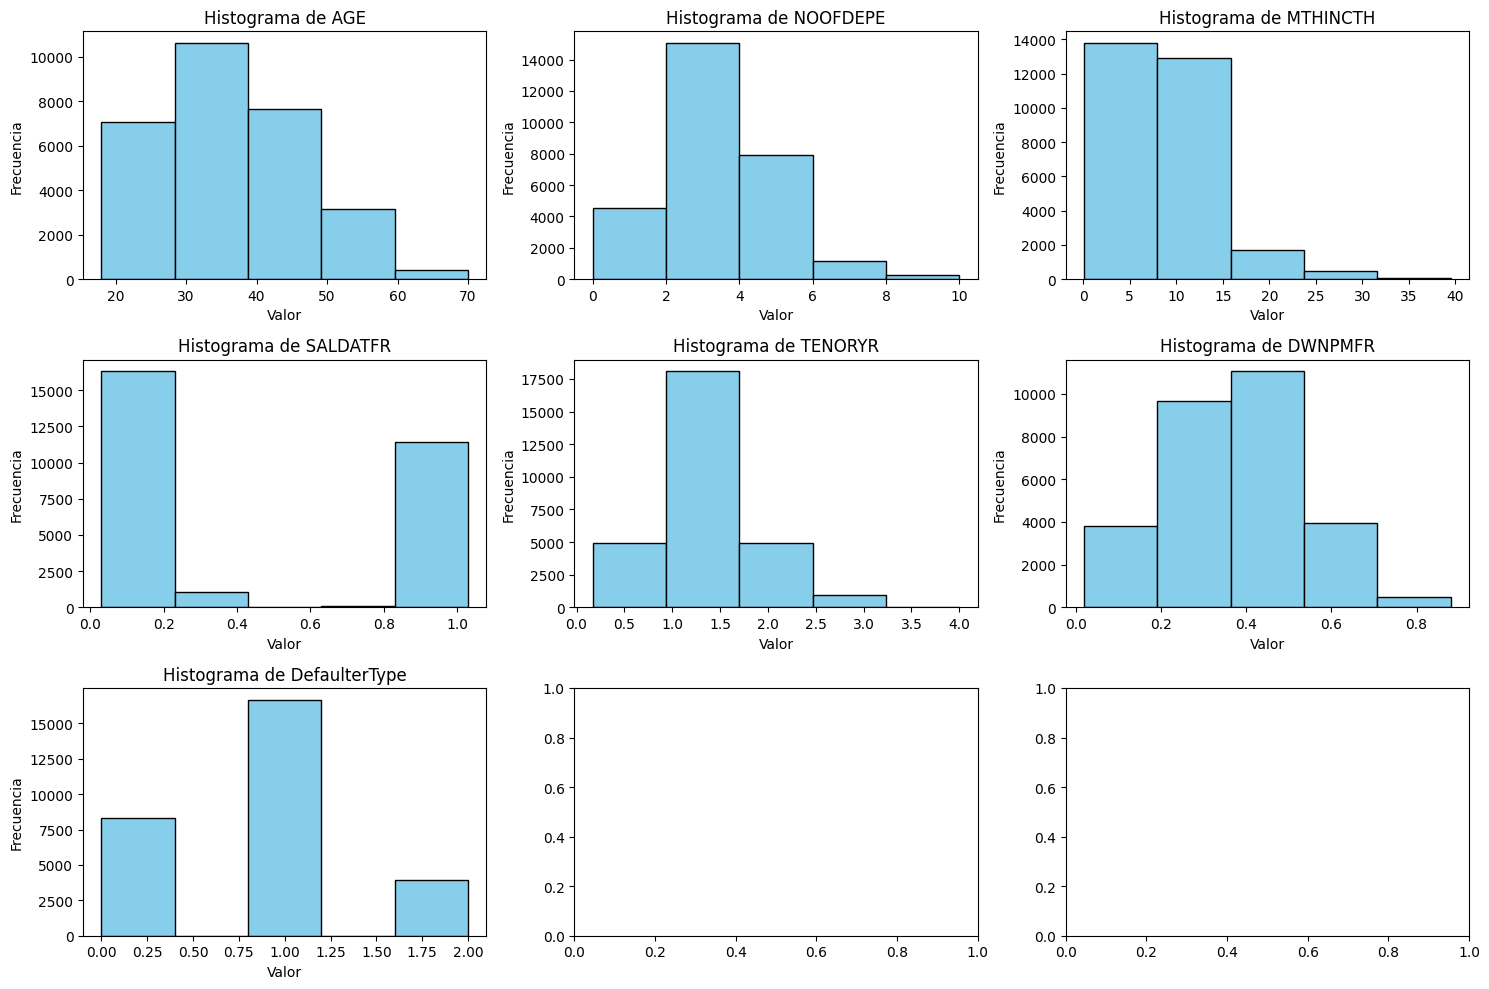

In [12]:
numeric_features_1 = ['AGE', 'NOOFDEPE', 'MTHINCTH', 'SALDATFR', 'TENORYR', 'DWNPMFR', 'DefaulterType']

# Crear una cuadrícula de subtramas para los histogramas
num_plots = len(numeric_features_1)
rows = num_plots // 2
cols = 2 if num_plots % 2 == 0 else 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Graficar los histogramas de las columnas numéricas en la cuadrícula
for i, numeric_column in enumerate(numeric_features_1):
    row = i // cols
    col = i % cols
    axes[row, col].hist(df[numeric_column], bins=5, color='skyblue', edgecolor='black')
    axes[row, col].set_title(f'Histograma de {numeric_column}')
    axes[row, col].set_xlabel('Valor')
    axes[row, col].set_ylabel('Frecuencia')

# Ajustar el diseño
plt.tight_layout()
plt.show()

In [13]:
df = df.drop(['DATASET', "Start_Date", "Agmt No","DefaulterType"], axis=1).reset_index(drop=True)

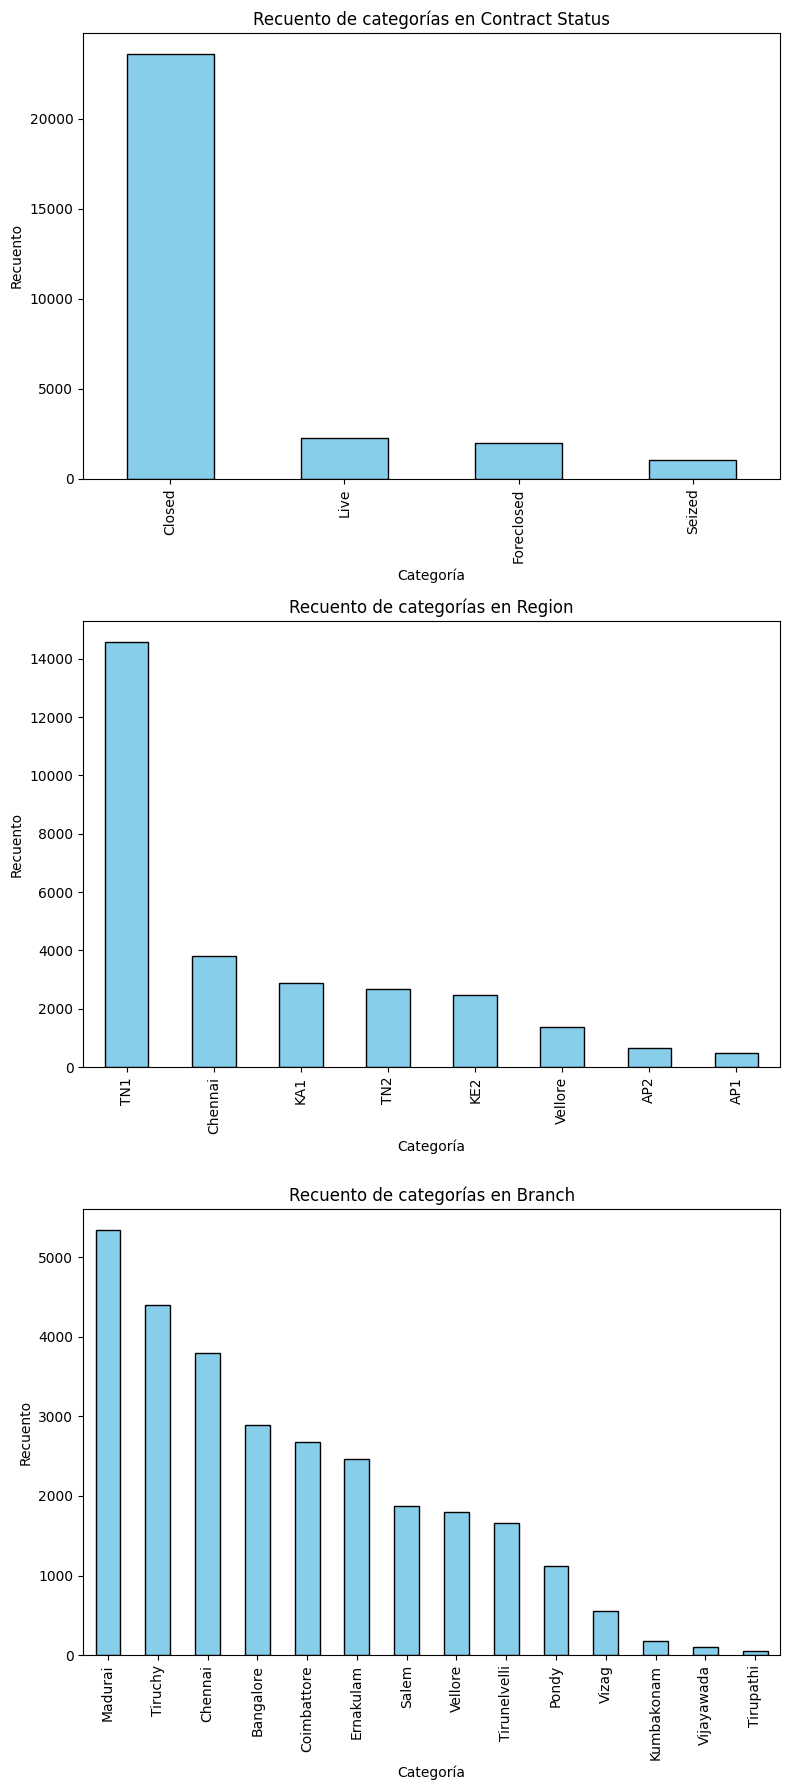

In [14]:
# Contar las ocurrencias de cada categoría en cada columna categórica
category_counts = {}
for column in df.select_dtypes(include='object'):
    category_counts[column] = df[column].value_counts()

# Graficar los recuentos de las categorías
fig, axes = plt.subplots(nrows=len(category_counts), ncols=1, figsize=(8, 6 * len(category_counts)))

for i, (column, counts) in enumerate(category_counts.items()):
    ax = axes[i]
    counts.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f'Recuento de categorías en {column}')
    ax.set_xlabel('Categoría')
    ax.set_ylabel('Recuento')

plt.tight_layout()
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28906 entries, 0 to 28905
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Contract Status  28906 non-null  object 
 1   AGE              28906 non-null  int64  
 2   NOOFDEPE         28906 non-null  int64  
 3   MTHINCTH         28906 non-null  float64
 4   SALDATFR         28906 non-null  float64
 5   TENORYR          28906 non-null  float64
 6   DWNPMFR          28906 non-null  float64
 7   PROFBUS          28906 non-null  int64  
 8   QUALHSC          28906 non-null  int64  
 9   QUAL_PG          28906 non-null  int64  
 10  SEXCODE          28906 non-null  int64  
 11  FULLPDC          28906 non-null  int64  
 12  FRICODE          28906 non-null  int64  
 13  WASHCODE         28906 non-null  int64  
 14  Region           28906 non-null  object 
 15  Branch           28906 non-null  object 
 16  DefaulterFlag    28906 non-null  int64  
dtypes: float64(4

In [16]:
df.head()

,Contract Status,AGE,NOOFDEPE,MTHINCTH,SALDATFR,TENORYR,DWNPMFR,PROFBUS,QUALHSC,QUAL_PG,SEXCODE,FULLPDC,FRICODE,WASHCODE,Region,Branch,DefaulterFlag
0,Closed,26,2,4.500,1.0,1.5,0.27,0,0,0,1,1,0,0,AP2,Vizag,0
1,Closed,28,2,5.589,1.0,2.0,0.25,0,0,0,1,1,1,0,AP2,Vizag,0
2,Closed,32,2,8.798,1.0,1.0,0.51,0,0,0,1,1,1,1,AP2,Vizag,0
3,Closed,31,0,5.000,1.0,1.0,0.66,0,0,0,1,1,1,1,AP2,Vizag,0
4,Closed,36,2,12.000,1.0,1.0,0.17,0,0,0,1,1,1,0,AP2,Vizag,0


In [17]:
# Split dataset into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)


In [18]:
print(numeric_features_1)

['AGE', 'NOOFDEPE', 'MTHINCTH', 'SALDATFR', 'TENORYR', 'DWNPMFR', 'DefaulterType']


In [19]:
numeric_features_1 = ['AGE', 'NOOFDEPE', 'MTHINCTH', 'SALDATFR', 'TENORYR', 'DWNPMFR']

### Step 2: Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on numeric features
train_data_scaled = train_data.copy()
numeric_features = numeric_features_1
train_data_scaled[numeric_features] = scaler.fit_transform(train_data[numeric_features])


In [21]:
# Fit and transform the scaler on numeric features
test_data_scaled = test_data.copy()
numeric_features = numeric_features_1
test_data_scaled[numeric_features] = scaler.fit_transform(test_data[numeric_features])


In [22]:
train_data_scaled.head()

,Contract Status,AGE,NOOFDEPE,MTHINCTH,SALDATFR,TENORYR,DWNPMFR,PROFBUS,QUALHSC,QUAL_PG,SEXCODE,FULLPDC,FRICODE,WASHCODE,Region,Branch,DefaulterFlag
11188,Live,0.267935,-1.145998,1.273186,1.272595,2.343152,-1.961318,0,1,0,0,0,0,0,KA1,Bangalore,1
18479,Closed,0.370178,0.094264,-0.607948,-0.892942,-0.545254,0.410178,1,0,0,1,1,1,0,Chennai,Chennai,0
26996,Closed,0.779150,0.714395,0.228111,-0.892942,-0.545254,-0.294861,0,0,0,1,0,0,0,TN1,Tiruchy,1
24072,Closed,-0.345523,0.094264,-0.816963,1.207629,-0.545254,0.922934,0,0,0,1,0,1,1,TN1,Tiruchy,1
2766,Closed,0.881393,1.334526,-0.085411,-0.589767,-0.545254,0.858840,1,0,0,1,1,0,0,TN1,Pondy,0


In [23]:
test_data_scaled.head()

,Contract Status,AGE,NOOFDEPE,MTHINCTH,SALDATFR,TENORYR,DWNPMFR,PROFBUS,QUALHSC,QUAL_PG,SEXCODE,FULLPDC,FRICODE,WASHCODE,Region,Branch,DefaulterFlag
8223,Closed,0.132583,-1.758943,-0.822112,1.238579,-0.549699,0.534517,0,0,0,1,0,1,1,TN2,Coimbattore,1
20582,Closed,-0.168870,0.704621,-0.862801,-0.784913,-0.549699,1.948381,0,0,0,1,0,1,0,TN1,Madurai,1
26346,Closed,-0.068386,0.088730,1.212336,-0.871945,-0.549699,0.663050,0,0,0,1,0,0,0,TN1,Tiruchy,1
6173,Closed,0.333552,1.320512,-0.923834,1.238579,-0.549699,0.984383,0,0,0,0,0,0,0,TN1,Salem,1
18568,Closed,-0.168870,-0.527161,0.805446,-0.871945,-0.549699,-0.172415,1,0,0,1,1,0,0,Chennai,Chennai,1


In [24]:
print(categorical_features_1)

['Agmt No', 'Contract Status', 'Start_Date', 'Region', 'Branch', 'DATASET']


In [25]:
categorical_features_1 = [ 'Contract Status','Region', 'Branch']

In [26]:
# Convert categorical features to one-hot encoded columns
#train_data_encoded = pd.get_dummies(train_data_scaled, columns=["DefaulterFlag"])
train_data_encoded = pd.get_dummies(train_data_scaled, columns=categorical_features_1)

# Separate features and target variable
X_train = train_data_encoded.drop(["DefaulterFlag"], axis=1)
y_train = train_data_encoded["DefaulterFlag"]


In [27]:
X_train.head()

,AGE,NOOFDEPE,MTHINCTH,SALDATFR,TENORYR,DWNPMFR,PROFBUS,QUALHSC,QUAL_PG,SEXCODE,...,Branch_Kumbakonam,Branch_Madurai,Branch_Pondy,Branch_Salem,Branch_Tiruchy,Branch_Tirunelvelli,Branch_Tirupathi,Branch_Vellore,Branch_Vijayawada,Branch_Vizag
11188,0.267935,-1.145998,1.273186,1.272595,2.343152,-1.961318,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
18479,0.370178,0.094264,-0.607948,-0.892942,-0.545254,0.410178,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
26996,0.779150,0.714395,0.228111,-0.892942,-0.545254,-0.294861,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
24072,-0.345523,0.094264,-0.816963,1.207629,-0.545254,0.922934,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2766,0.881393,1.334526,-0.085411,-0.589767,-0.545254,0.858840,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [28]:
# Convert categorical features to one-hot encoded columns
test_data_encoded = pd.get_dummies(test_data_scaled, columns=categorical_features_1)

# Prepare test data
X_test = test_data_encoded.drop(["DefaulterFlag"], axis=1)
y_test = test_data_encoded["DefaulterFlag"]


### Step 3: Model Training

In [29]:
X_train.head()

,AGE,NOOFDEPE,MTHINCTH,SALDATFR,TENORYR,DWNPMFR,PROFBUS,QUALHSC,QUAL_PG,SEXCODE,...,Branch_Kumbakonam,Branch_Madurai,Branch_Pondy,Branch_Salem,Branch_Tiruchy,Branch_Tirunelvelli,Branch_Tirupathi,Branch_Vellore,Branch_Vijayawada,Branch_Vizag
11188,0.267935,-1.145998,1.273186,1.272595,2.343152,-1.961318,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
18479,0.370178,0.094264,-0.607948,-0.892942,-0.545254,0.410178,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
26996,0.779150,0.714395,0.228111,-0.892942,-0.545254,-0.294861,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
24072,-0.345523,0.094264,-0.816963,1.207629,-0.545254,0.922934,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2766,0.881393,1.334526,-0.085411,-0.589767,-0.545254,0.858840,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [30]:
y_train

11188    1
18479    0
26996    1
24072    1
2766     0
        ..
21575    1
5390     1
860      0
15795    0
23654    0
Name: DefaulterFlag, Length: 23124, dtype: int64

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# Initialize models
logreg_model = LogisticRegression()
tree_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
svm_model = SVC()

# Train models
logreg_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

### Step 4: Model Evaluation

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions
logreg_pred = logreg_model.predict(X_test)
tree_pred = tree_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

# Evaluate models
logreg_accuracy = accuracy_score(y_test, logreg_pred)
tree_accuracy = accuracy_score(y_test, tree_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

logreg_precision = precision_score(y_test, logreg_pred)
tree_precision = precision_score(y_test, tree_pred)
rf_precision = precision_score(y_test, rf_pred)
svm_precision = precision_score(y_test, svm_pred)

logreg_recall = recall_score(y_test, logreg_pred)
tree_recall = recall_score(y_test, tree_pred)
rf_recall = recall_score(y_test, rf_pred)
svm_recall = recall_score(y_test, svm_pred)

logreg_f1 = f1_score(y_test, logreg_pred)
tree_f1 = f1_score(y_test, tree_pred)
rf_f1 = f1_score(y_test, rf_pred)
svm_f1 = f1_score(y_test, svm_pred)


In [33]:
# Almacenar los resultados en listas
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
accuracies = [logreg_accuracy, tree_accuracy, rf_accuracy, svm_accuracy]
precisions = [logreg_precision, tree_precision, rf_precision, svm_precision]
recalls = [logreg_recall, tree_recall, rf_recall, svm_recall]
f1_scores = [logreg_f1, tree_f1, rf_f1, svm_f1]

# Crear un DataFrame con los resultados
results_df = pd.DataFrame({'Model': models,
                           'Accuracy': accuracies,
                           'Precision': precisions,
                           'Recall': recalls,
                           'F1-Score': f1_scores})

# Imprimir el DataFrame
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.750432   0.781542  0.905588  0.839005
1        Decision Tree  0.658769   0.767888  0.752168  0.759946
2        Random Forest  0.734867   0.780107  0.878372  0.826328
3                  SVM  0.750605   0.785504  0.897881  0.837941


In [34]:
print(f'logreg_accuracy: {logreg_accuracy}, tree_accuracy: {tree_accuracy}, rf_accuracy: {rf_accuracy}, svm_accuracy: {svm_accuracy}')

logreg_accuracy: 0.7504323763403666, tree_accuracy: 0.6587685921826357, rf_accuracy: 0.7348668280871671, svm_accuracy: 0.7506053268765133


### Step 5: Interpretability

Explain the decision rules forthe models using their .feature_importances_ and .coef_ attributes.

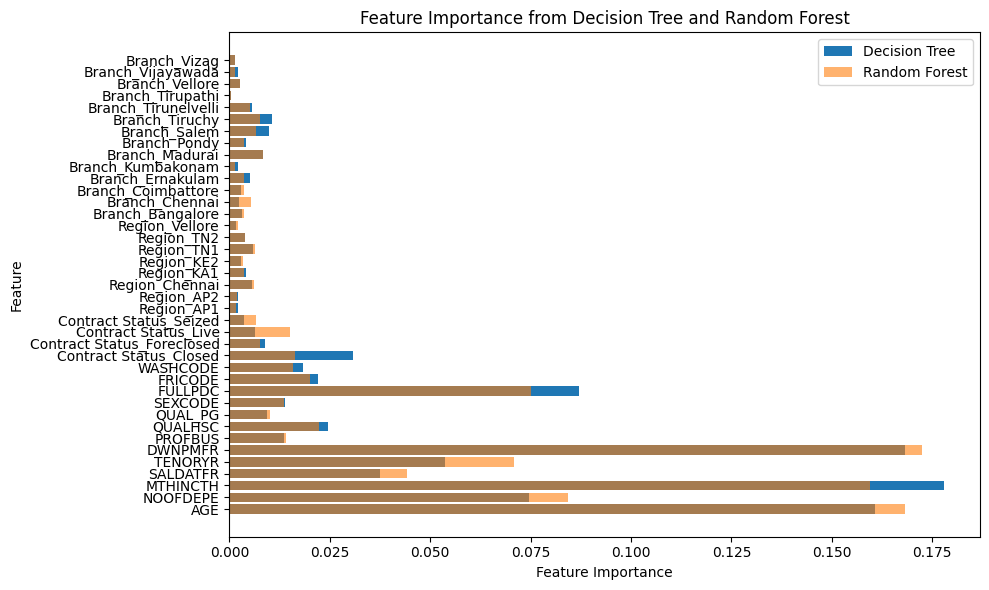

In [35]:
import matplotlib.pyplot as plt

# Get feature importances from the models
tree_feature_importances = tree_model.feature_importances_
rf_feature_importances = rf_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), tree_feature_importances, align='center', label='Decision Tree')
plt.barh(range(len(feature_names)), rf_feature_importances, align='center', label='Random Forest', alpha=0.6)
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Decision Tree and Random Forest')
plt.legend()
plt.tight_layout()
plt.show()


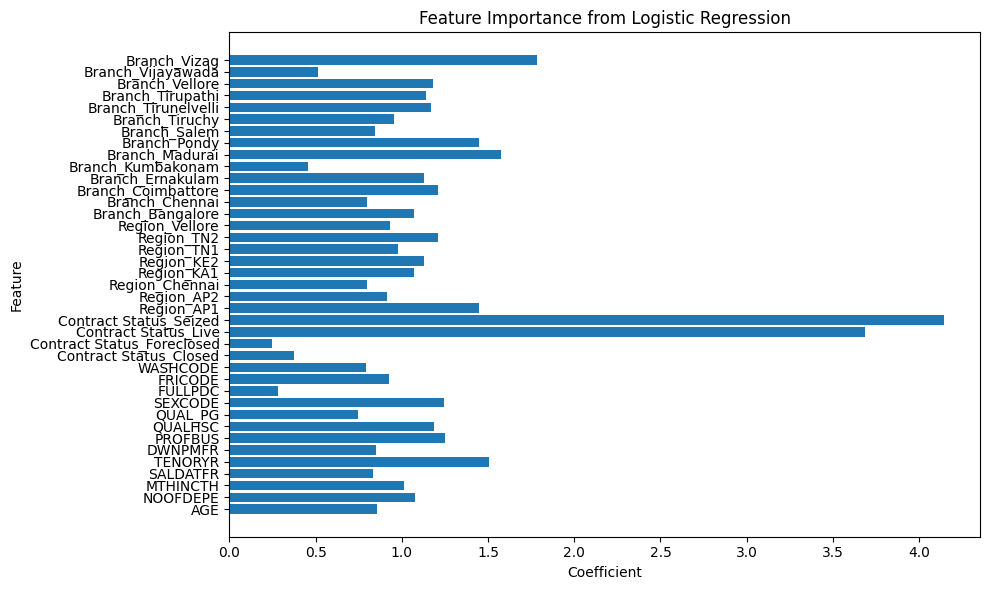

In [36]:
# Get absolute coefficients from the logistic regression model
logreg_coeffs = np.exp(logreg_model.coef_[0])

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), logreg_coeffs, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression')
plt.tight_layout()
plt.show()


### Step 6: Parameter Tuning

You can use techniques like grid search or random search to find optimal hyperparameters for each algorithm

Parameter tuning is a crucial step in optimizing the performance of machine learning models. Each algorithm has various parameters that can be adjusted to improve their predictive accuracy and generalization. In this step, you search for the best combination of parameter values to achieve the best model performance. Let's go through an explanation and example for each algorithm.

1. Logistic Regression:

For logistic regression, one common parameter is the regularization strength (C). A smaller C increases the regularization, which can prevent overfitting.

In [37]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameter
best_C = grid_search.best_params_['C']

# Train a Logistic Regression model with the best parameter
best_logreg_model = LogisticRegression(C=best_C)
best_logreg_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression(C=0.01)

2. Decision Trees:

For decision trees, an important parameter is the maximum depth of the tree (max_depth). A deeper tree can lead to overfitting, so you need to find an optimal value for this parameter.

In [38]:
param_grid = {'max_depth': [None, 5, 10, 15, 20]}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_max_depth = grid_search.best_params_['max_depth']

best_tree_model = DecisionTreeClassifier(max_depth=best_max_depth)
best_tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5)

3. Random Forest:

Random Forests have parameters like the number of trees (n_estimators) and the maximum depth of each tree (max_depth). Tuning these parameters can improve the performance of the ensemble.

In [39]:
param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']

best_rf_model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth)
best_rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10)

4. Support Vector Machines (SVM):

For SVMs, parameters like the regularization parameter (C) and the choice of kernel (kernel) are important to tune. The kernel can be linear, polynomial, or radial basis function (RBF).

In [40]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf']}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_C = grid_search.best_params_['C']
best_kernel = grid_search.best_params_['kernel']

best_svm_model = SVC(C=best_C, kernel=best_kernel)
best_svm_model.fit(X_train, y_train)


SVC(C=1)

In each example, we're using GridSearchCV to perform a grid search over the specified parameter values. The cv parameter indicates the number of folds in cross-validation, and scoring specifies the evaluation metric. After finding the best parameter combination, a new model is trained using the best parameters.

Remember that these are simplified examples, and you can explore more parameters and values to fine-tune your models further. Also, be mindful of the computational cost of exhaustive grid searches, as they can become time-consuming with larger datasets or complex models.

## Step 7: Conclusion

Summarize the results based on accuracy, precision, recall, and F1-score metrics and discuss which algorithm might be the most suitable for this loan approval prediction problem.

In [45]:
# Initialize models with best parameters
logreg_model = LogisticRegression(C=0.01)
tree_model = DecisionTreeClassifier(max_depth=5)
rf_model = RandomForestClassifier(n_estimators=150, max_depth=10)
svm_model = SVC(C=0.1)

# Train models
logreg_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)


SVC(C=0.1)

In [46]:
from sklearn.metrics import classification_report

# Make predictions on the test set
logreg_preds = logreg_model.predict(X_test)
tree_preds = tree_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
svm_preds = svm_model.predict(X_test)

# Generate classification reports
logreg_report = classification_report(y_test, logreg_preds, target_names=['Class 0', 'Class 1'], output_dict=True)
tree_report = classification_report(y_test, tree_preds, target_names=['Class 0', 'Class 1'], output_dict=True)
rf_report = classification_report(y_test, rf_preds, target_names=['Class 0', 'Class 1'], output_dict=True)
svm_report = classification_report(y_test, svm_preds, target_names=['Class 0', 'Class 1'], output_dict=True)

# Print the results in a table
print("{:<15} {:<10} {:<10} {:<10} {:<10}".format('Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'))
print("-" * 50)
for model, report in zip(['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM'], [logreg_report, tree_report, rf_report, svm_report]):
    accuracy = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    print("{:<15} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format(model, accuracy, precision, recall, f1_score))


Model           Accuracy   Precision  Recall     F1-Score  
--------------------------------------------------
Logistic Regression 0.7527     0.7313     0.7527     0.7230    
Decision Tree   0.7404     0.7134     0.7404     0.6985    
Random Forest   0.7518     0.7301     0.7518     0.7234    
SVM             0.7503     0.7281     0.7503     0.7168    
